<a href="https://colab.research.google.com/github/ThuongNguyen66/Fundamental-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [6]:
## parsing data here
images, labels = parse_data(df)


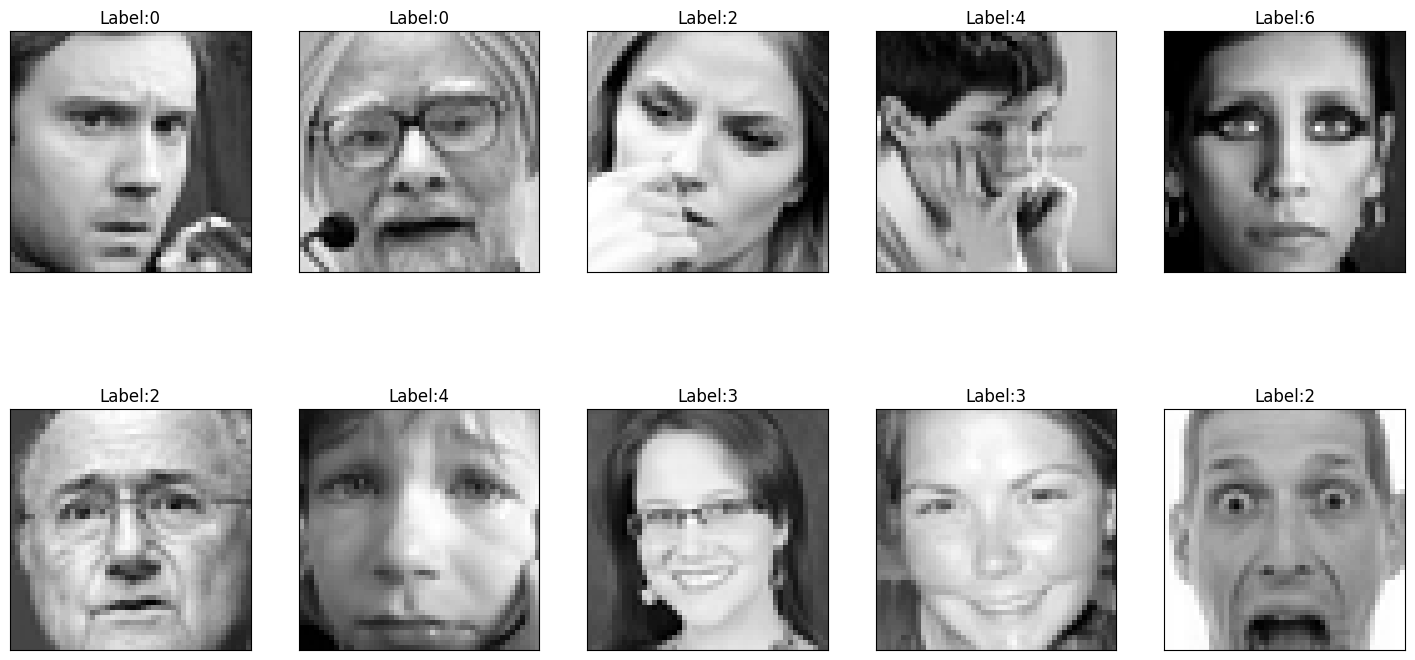

In [7]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [8]:
from sklearn.decomposition import PCA
# Định hình lại hình ảnh để dùng cho PCA
images_reshaped = images.reshape((images.shape[0], -1))
#áp dụng pca
pca=PCA(n_components=2)
images_pca = pca.fit_transform(images_reshaped)

In [9]:
images_pca.shape

(35887, 2)

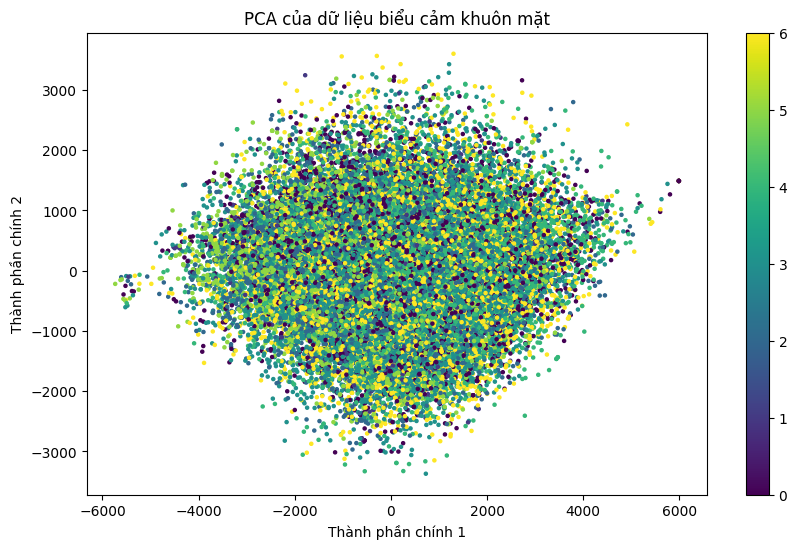

In [10]:
# Hình dung dữ liệu được PCA chuyển đổi
plt.figure(figsize=(10, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar()
plt.title("PCA của dữ liệu biểu cảm khuôn mặt")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.show()

In [11]:
num_images_to_display = 10
random_indices = np.random.choice(images.shape[0], num_images_to_display, replace=False)


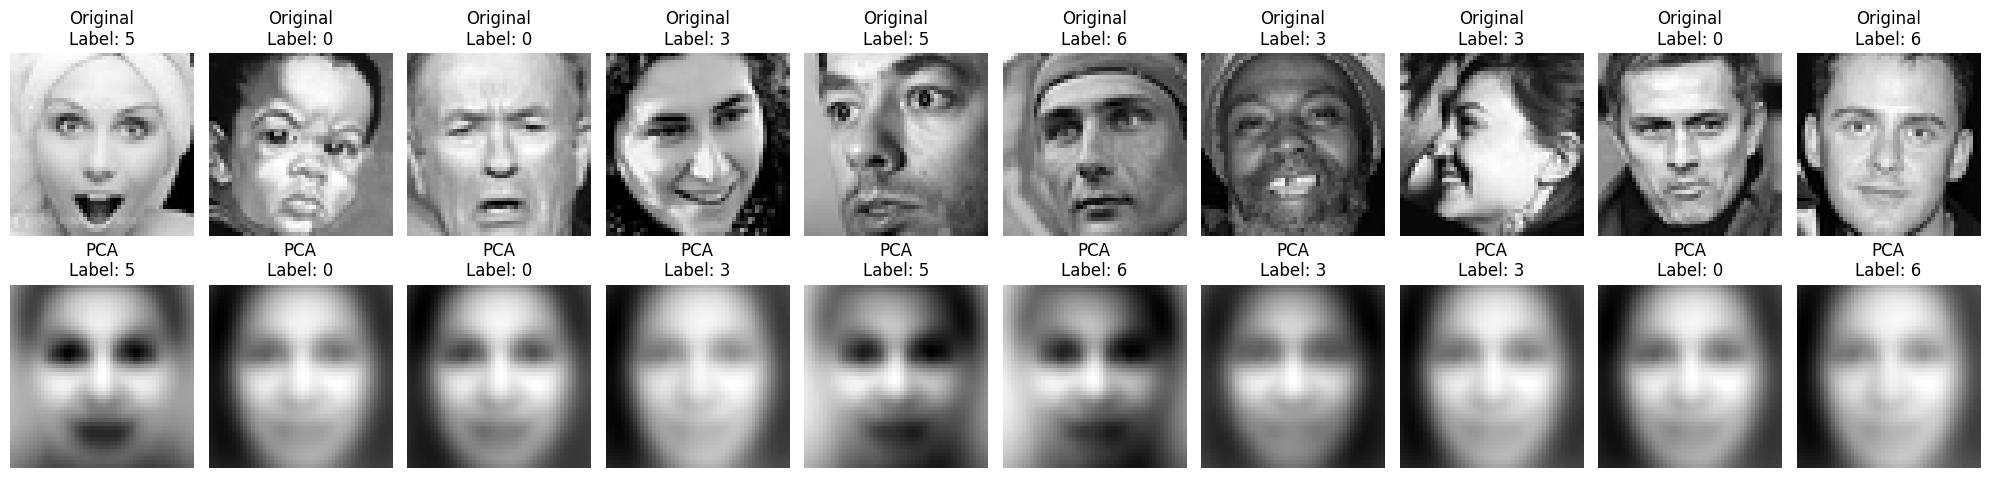

In [12]:
fig, axes = plt.subplots(2, num_images_to_display, figsize=(20, 5))
for i, idx in enumerate(random_indices):
    # Hình ảnh gốc
    ax = axes[0, i]
    ax.imshow(images[idx], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original\nLabel: {labels[idx]}')

    # Hình ảnh sau PCA
    ax = axes[1, i]
    pca_image = pca.inverse_transform(images_pca[idx].reshape(1, -1)).reshape(48, 48)
    ax.imshow(pca_image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'PCA\nLabel: {labels[idx]}')

plt.tight_layout()
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [13]:
## determine the optimal number of PCs here
## pca.explained_variance_()

In [14]:
# Áp dụng PCA không giới hạn số lượng thành phần
pca_full = PCA()
pca_full.fit(images_reshaped)

PCA()

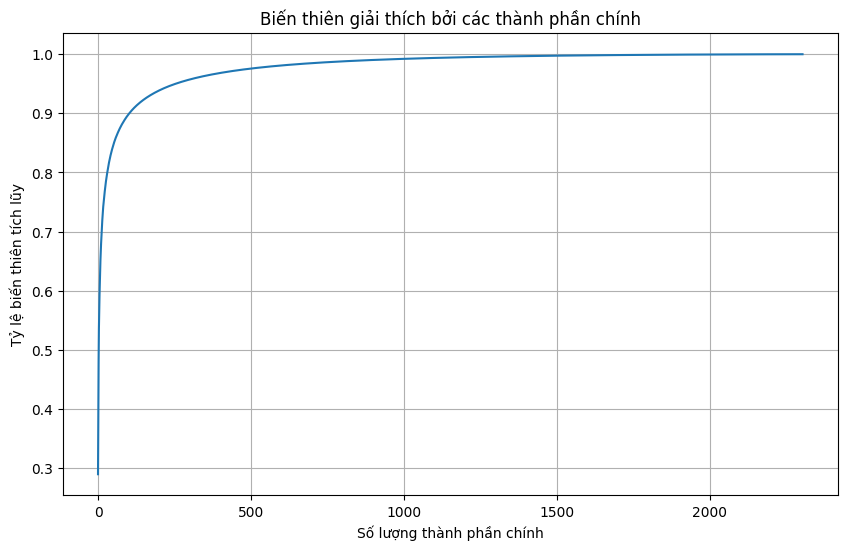

In [15]:
# Vẽ biểu đồ biến thiên giải thích
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ biến thiên tích lũy')
plt.title('Biến thiên giải thích bởi các thành phần chính')
plt.grid(True)
plt.show()

In [16]:
# Xác định số lượng thành phần chính giải thích 95% biến thiên
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Số lượng thành phần chính tối ưu: {optimal_n_components}')

Số lượng thành phần chính tối ưu: 255


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
## splitting data into train/val/test subsets here
X_train, X_temp, y_train, y_temp = train_test_split(images_reshaped, labels, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [18]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

In [19]:
# Áp dụng PCA trên dữ liệu huấn luyện
pca = PCA(n_components=optimal_n_components)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [23]:
# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

In [ ]:
# So sánh hiệu suất của 4 thuật toán phân loại khác nhau (3 mô hình machine learning và 1 mô hình MLP) ở cả hai định dạng trên. Tinh chỉnh siêu tham số bằng GridSearchCV
param_grids = {
    'KNN':{'classifier__n_neighbors': [3, 5, 7]}, # Correct the parameter name here
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200]},
    'MLP': {'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)]}
}

results = {}

for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', classifier)
    ])

    grid_search = RandomizedSearchCV(pipeline, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Báo cáo phân loại cho {name} với dữ liệu gốc:")
    print(classification_report(y_test, y_pred))
    results[f"{name} (Dữ liệu Gốc)"] = classification_report(y_test, y_pred, output_dict=True)

    grid_search.fit(X_train_pca, y_train)
    best_model = grid_search.best_estimator_
    y_pred_pca = best_model.predict(X_test_pca)
    print(f"Báo cáo phân loại cho {name} với dữ liệu đã PCA biến đổi:")
    print(classification_report(y_test, y_pred_pca))
    results[f"{name} (Dữ liệu PCA)"] = classification_report(y_test, y_pred_pca, output_dict=True)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here

In [ ]:
import seaborn as sns

In [ ]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
    plt.ylabel('Nhãn thực')
    plt.xlabel('Nhãn dự đoán')
    plt.title(title)
    plt.show()

In [ ]:
# Đánh giá cuối cùng trên tập kiểm tra
for name, clf in classifiers.items():
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', clf)])
    pipe.set_params(**grid_search.best_params_).fit(X_train, y_train)

    # Đánh giá trên dữ liệu kiểm tra gốc
    y_test_pred = pipe.predict(X_test)
    print(f'Báo cáo phân loại cho {name} trên tập kiểm tra:\n', classification_report(y_test, y_test_pred))
    plot_confusion_matrix(y_test, y_test_pred, f'Ma trận nhầm lẫn cho {name} trên tập kiểm tra')

    # Đánh giá trên dữ liệu kiểm tra đã được PCA chuyển đổi
    pipe.set_params(**grid_search.best_params_).fit(X_train_pca, y_train)
    y_test_pca_pred = pipe.predict(X_test_pca)
    print(f'Báo cáo phân loại cho {name} (PCA) trên tập kiểm tra:\n', classification_report(y_test, y_test_pca_pred))
    plot_confusion_matrix(y_test, y_test_pca_pred, f'Ma trận nhầm lẫn cho {name} (PCA) trên tập kiểm tra')
